In [1]:
# importar paquetes y darles alias
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

Realizamos la importación del dataset de calidad de la leche:

# Análisis exploratorio de datos

El conjunto de datos consiste en 1058 muestras de leche con 7 características que describen sus diferentes propiedades químicas

In [32]:
df = pd.read_csv('/Users/josealbertomurcia/OneDrive/Documentos/jose/Training/Maestria Rosario 2021/Aprendizaje de Maquinas/Borrador Milk/Milk Grading (1).csv')

In [33]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


In [36]:
print('Grados de calidad', np.unique(df['Grade']))

Grados de calidad [0.  0.5 1. ]


Las muestras pertenecen a una de las tres clases distintas de leche que se refieren a la calidad de la leche asigando el valor de cero (0.) a  leche de mala calidad, (0.5) a leche de calidad moderada y (1.) a leche de buena calidad. 

In [236]:
# Determinando los valores mínimos, máximos, media y mediana para la variable Temprature

print("Min: ", df["Temprature"].min())
print("Max: ", df["Temprature"].max())
print("Media/promedio: ", df["Temprature"].mean())
print("Mediana: ", df["Temprature"].median())

Min:  34
Max:  90
Media/promedio:  44.226628895184135
Mediana:  41.0


In [237]:
# Determinando los valores mínimos, máximos, media y mediana para la variable pH

print("Min: ", df["pH"].min())
print("Max: ", df["pH"].max())
print("Media/promedio: ", df["pH"].mean())
print("Mediana: ", df["pH"].median())

Min:  3.0
Max:  9.5
Media/promedio:  6.630122757318263
Mediana:  6.7


In [239]:
# graficamos diagrama de violín con data y diagrama de caja para la variable pH
fig = px.violin(df, y="pH", box=True, 
                points='all', 
               )
fig.show()

In [240]:
# graficamos diagrama de violín con data y diagrama de caja para la variable Temprature
fig = px.violin(df, y="Temprature", box=True, 
                points='all', 
               )
fig.show()

De acuerdo al Dataset, contamos con temperatura que va desde 34° hasta 90° con una media o promedio de 44° en la evaluación de la calidad de la leche. La mayor densidad de datos para la varibale temperatura la tenemos en 38º (q1), y le sigue en 45º(q3). 
Así mismo, se cuentan con valores ácidos (pH<7.0) y básicos (pH>7.0) para la leche.Y tenemos una mayor densidad de datos para el rango comprendido entre 6.5 y 6.8 (quartiles 1 y 3).

# Normalización y estandarización de las características

A continuación definimos el conjunto de datos que se usará para entrenamiento y el conjunto de datos que se usarán para prueba mediante la función train_test_split

In [312]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,:7].values, df.iloc[:, 7].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

Asignamos el 30% de las muestras de vino a evaluación y 70% restante de las muestras a entrenamiento. Hacemos uso de estratify para garantizar que el conjunto de datos de prueba y el de entrenamiento tengan las mismas proporciones de clase que el conjunto de datos original.

Mediante la Normalización queremos realizar un re-escalado de las características en un rango de cero a uno [0,1] y se puede realizar del siguiente modo:

In [313]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [314]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train_norm)
X_test_std = stdsc.transform(X_test_norm)

Teniendo en cuenta que el dataset presenta valores continuos para la variable objetivo (Grade), se hace necesario realizar un preprocesamiento de éstos datos para poder cotinuar con el uso de los modelos de regresión logística y KNN. Vamos a realizar esto mediante el uso de LabelEncoder con el fin de hacer uso de los números enteros 0, 1 y 2 para definir la calidad de la leche como mala, regular y buena, respectivamente.

In [315]:
from sklearn import preprocessing
from sklearn import utils

In [316]:
# Hacemos uso de LabelEncoder para eliminar el error asociado al uso de variables continuas 
# para nuestro parámetro objetivo. En este caso, para los datos de entrenamiento de la variable 'Grade'

lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
#print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train))

multiclass
multiclass
multiclass


In [317]:
# ... En este caso, para los datos de evaluación de la variable 'Grade'

lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
y = lab_enc.fit_transform(y)

A continuación, vamos a evaluar el rendimiento del clasificador KNN en el conjunto de prueba original

In [265]:
knn = KNeighborsClassifier(n_neighbors=5)

In [266]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9946018893387314
Test accuracy: 0.9905660377358491


A continuación, vamos a evaluar el rendimiento del clasificador de regresión logística en el conjunto de prueba original

In [267]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.8475033738191633
Test accuracy: 0.8679245283018868


De acuerdo a esos resultados, podemos pensar que nuestro modelo de clasificación KNN ya generaliza bien los nuevos datos

# Importancia de las características

## 1. Haciendo uso de feature_selection

 1) pH                             0.395985
 2) Temprature                     0.227842
 3) Turbidity                      0.094503
 4) Fat                            0.087493
 5) Odor                           0.083966
 6) Colour                         0.062951
 7) Taste                          0.047260


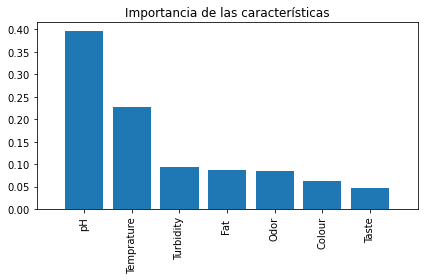

In [279]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df.columns[:7]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Importancia de las características')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Vamos a reducir el conjunto de datos a las dos características más importantes mediante el uso de 'feature_selection'

In [280]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train_std)

In [281]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) pH                             0.395985
 2) Temprature                     0.227842


## 2. Haciendo uso de PCA

En primera instancia, contruimos la matriz de covarianza

In [282]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.8319047 , 0.14647499, 0.01421392, 0.00346374, 0.0020251 ,
       0.00101304, 0.00090452])

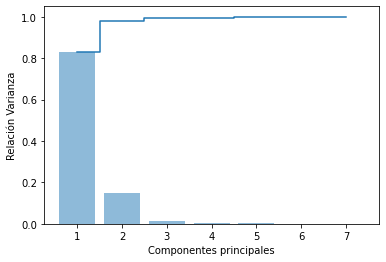

In [283]:
plt.bar(range(1, 8), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 8), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Relación Varianza')
plt.xlabel('Componentes principales')

plt.show()

El gráfico indica que el primer componente principal por sí solo representa aproximadamente el 80% de la varianza. Además, podemos ver que los dos primeros componentes principales combinados explican casi el 100% de la varianza en el conjunto de datos.

In [290]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

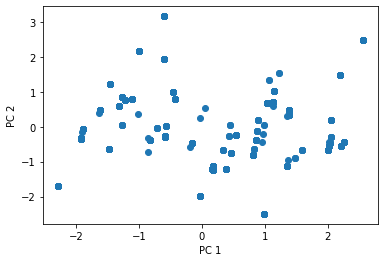

In [291]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [292]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [293]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Ahora vamos a ver la regiones de decisión para los datos de entrenamiento reducidos a dos ejes de los componentes principales

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


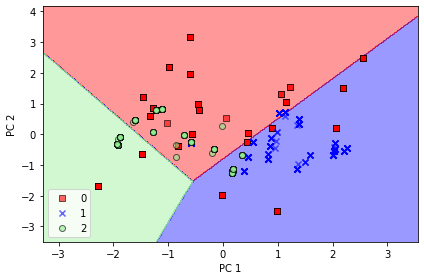

In [294]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Seguidamente vamos a mostrar gráficamente la regiones de decisión para el conjunto de prueba que se designó a modo de valuación

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


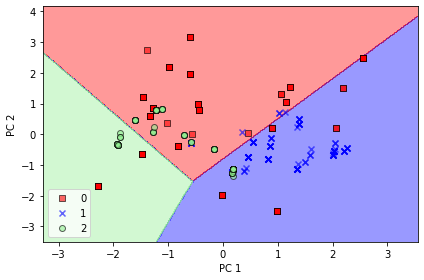

In [295]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Se puede apreciar que la regresión logística no funciona muy bien y que clasifica erróneamente varias muestras del conjunto de datos de prueba

# Modelos de clasificación

## 1. Baggin

In [318]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [319]:
from sklearn.metrics import accuracy_score

bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.997


In [320]:
bag_clf = BaggingClassifier(max_features=2)
cross_val_score(bag_clf, X,y, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.9046633282661182

Usando la validación cruzada, el resultado para Baggin desmejora pero sigue siendo aceptable

## 2. Árbol de clasificación

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


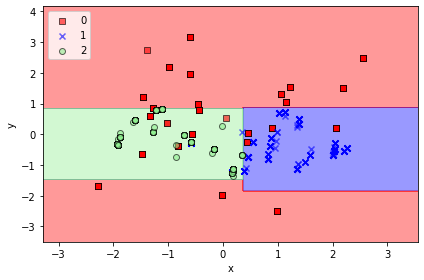

In [325]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_pca, y_train)

X_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [322]:

y_train_pred = tree.predict(X_train_pca)
y_test_pred = tree.predict(X_test_pca)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

Decision tree train/test accuracies 0.848/0.849


In [326]:
cross_val_score(tree, X_combined,y_combined, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.8479567200214613

## 3. KNN

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


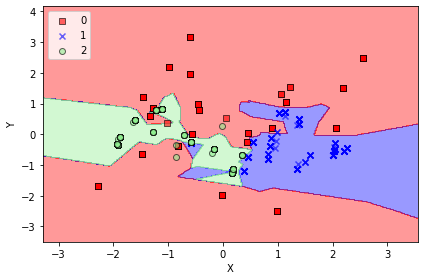

In [323]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, 
                      classifier=knn)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

In [351]:
cross_val_score(knn, X,y, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.9914915496736117

## 4. Perceptron

In [328]:

print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_train: [300 262 179]
Labels counts in y_test: [129 112  77]


In [330]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 56
Accuracy: 0.82


In [350]:
cross_val_score(ppn, X,y, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.5004918179379416

In [333]:
# Cargando modulos
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
# from sklearn.externals.six import StringIO 
import graphviz 

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score

from xgboost import XGBClassifier, XGBRegressor
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings('ignore')

# Para ser reproducible
np.random.seed(42)

%matplotlib inline

## 5. Random Forest

In [352]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_std,y_train)
RF_clf.score(X_train_std,y_train)

1.0

In [353]:
cross_val_score(RandomForestClassifier(random_state=42),X,y,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


0.9962174729500134

El resultado de la validación cruzada es similar al del modelo.

## 6. Boosting
### Gradient boosting classifier

In [354]:
GBC_clf = GradientBoostingClassifier(learning_rate=0.1)
GBC_clf.fit(X_train_std,y_train)
GBC_clf.score(X_train_std,y_train)

1.0

In [355]:
cross_val_score(GradientBoostingClassifier(learning_rate=0.1)
, X,y, cv=5, verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


0.9943306804971831

Los resultados de la validación cruzada para Random Forest y Gradient boosting classifier son idénticos y excelentes.

## 7. XGBoost

In [357]:
from xgboost import XGBClassifier

xgb_cl = XGBClassifier(learning_rate=0.1, max_depth=2, eval_metric="mlogloss")

# Validacion cruzada de 5 folds, mide el Accuracy y se ha colocado
# verbose=1 para mostrar informacion sobre el proceso.
cross_val_score(xgb_cl,X,y,cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


0.9952740767235984

El accuracy de XGBoost es excelente, aunque sigue siendo mejor para el modelo Random Forest.

In [358]:
xgb_cl.fit(X,y)
xgb_cl.score(X,y)

0.996222851746931

## Buscando los mejores hiperparámetros

In [359]:
xgb_cl = XGBClassifier(eval_metric="mlogloss",nthread=4)
clf = GridSearchCV( xgb_cl,
                  {'max_depth':[3,6,10], 
                   'n_estimators': [100,500,1000],
                  'learning_rate': [0.01, 0.05, 0.1]},
                   cv = 5,verbose=1,n_jobs=5)
clf.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None

In [360]:
print(clf.best_score_) # r2_score de la validacion cruzada Los mejores hiperparametros
print(clf.best_params_) # Los mejores hiperparametros

0.9962174729500134
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}


In [361]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

xgb_cl = XGBClassifier(eval_metric="mlogloss",nthread=4)
param_grid = {"max_depth": randint(2,5),
              "learning_rate": uniform(0.001,0.4), 
              "n_estimators": randint(25,200)}

# Se probaran 200 combinaciones de los parametros definidos en param_dist
# en cada validacion cruzada, es decir, 1000 iteraciones
clf = RandomizedSearchCV(xgb_cl, param_grid, n_iter=400, cv=5, n_jobs=5,verbose=1, random_state=42)

clf.fit(X,y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=400, n_jobs=5,
           

In [362]:
print(clf.best_score_) # accuracy medio de la validacion cruzada
print(clf.best_params_) # Los mejores hiperparametros.

0.9962174729500134
{'learning_rate': 0.3516645943703171, 'max_depth': 4, 'n_estimators': 133}


Se puede concluir que el mejor accuracy se obtiene con el modelo XGBoost con un learning rate de 0.35, nivel profundidad de 4 y 133 estimadores; aunque muy similar al de los modelos Random Forest y Gradient boosting classifier.

# Técnicas de clustering

## K-means

Inicialmente, vamos a separar el conjunto de datos en 3 grupos

In [363]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

Posteriormente, vamos a graficar los grupos y centroides para visualizar el modo en que fueron agrupados.

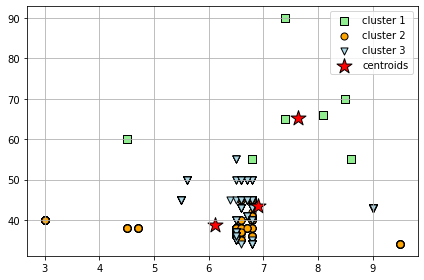

In [364]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Como se puede ver, no se aprecia un agrupamiento 'ideal', pero esto lo podemos evaluar mediante la métrica de silueta, la cual sigue a continuación:

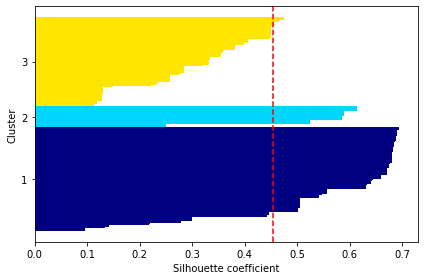

In [367]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

Cómo podemos ver el gráfico resultante, las siluetas tienen visiblemente diferentes longitudes y anchuras, lo cual demuestra un agrupamiento relativamente malo.
La línea punteada corresponde al coeficiente de silueta medio.

Ahora evaluaremos que ocurre si queremos agrupar en dos (2) grupos:

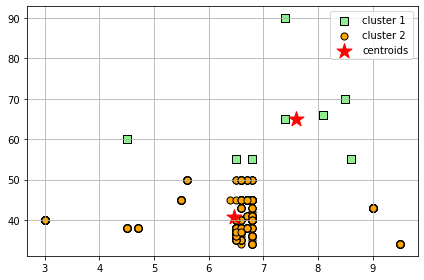

In [368]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Aquí se definen los centroides, y pareciera tener una mejor distribución, pero esto lo evaluaremos mediante la métrica de silueta:

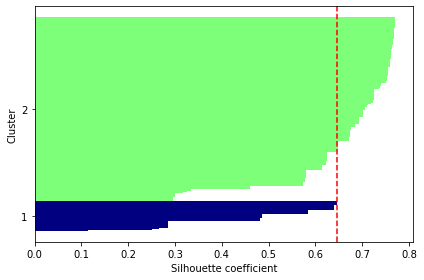

In [369]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

Cómo podemos ver el gráfico resultante, las siluetas tienen visiblemente diferentes longitudes y anchuras, lo cual demuestra un agrupamiento relativamente malo o, como mínimo, insuficiente.

Ahora bien, si quisiéramos evaluar 4 grupos, la distribución sería como sigue a continuación:

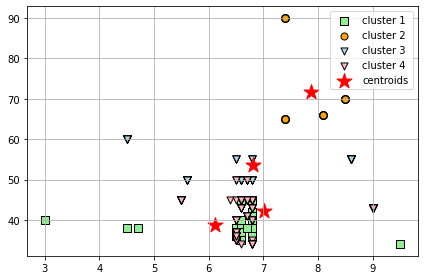

In [370]:
km = KMeans(n_clusters=4, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='lightpink',
            marker='v', edgecolor='black',
            label='cluster 4')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

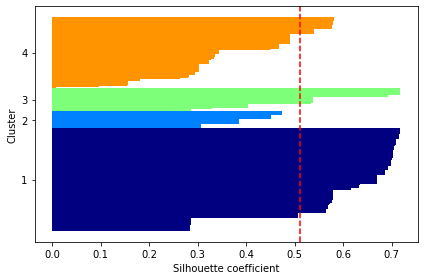

In [371]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

En este caso, uno de los grupos no alcanza el coeficiente de silueta medio (línea punteada), por lo que podemos pensar que la mejor distribución corresponde a tres (3) grupos, a pesar de que no los agrupa como debiera.

In [383]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [2 2 0 ... 2 2 0]


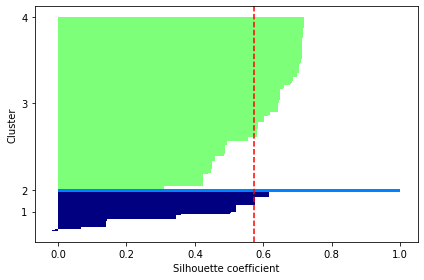

In [391]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

Como podemos ver, el clustering jerarquizado no es mejor que K-means para agrupar los valores de todo el conjunto.